In [0]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

cph_url = 'https://raw.githubusercontent.com/jingyiis/BDA_CBS_Airbnb/master/cph_cleaned.csv'
price_filtered_cph = pd.read_csv(cph_url)

In [0]:
sg_url = 'https://raw.githubusercontent.com/jingyiis/BDA_CBS_Airbnb/master/sg_cleansed.csv'
price_filtered_sg = pd.read_csv(sg_url)

In [0]:
cph_rf = price_filtered_cph.copy()
sg_rf = price_filtered_sg.copy()

## Drop Columns irrelevant to Price
col_to_drop = ['id','city', 'longitude', 'latitude', 'host_since']
cph_rf = cph_rf.drop(col_to_drop, axis = 1)
sg_rf = sg_rf.drop(col_to_drop, axis = 1)

## Convert catergorical variables into dummy variables with one-hot-encoding
cols_to_convert = ['property_type', 'room_type', 'neighbourhood_cleansed']
cph_rf = pd.get_dummies(cph_rf, columns = cols_to_convert)
sg_rf = pd.get_dummies(sg_rf, columns = cols_to_convert)

### Drop any rows with null variables 
cph_rf = cph_rf.dropna()
sg_rf = sg_rf.dropna()

In [4]:
cph_rf2 = cph_rf.copy()
sg_rf2 = sg_rf.copy()

cph_rf2['review_scores_rating'] = cph_rf2['review_scores_rating'].replace(0.0, 0.01)
cph_rf2['review_scores_rating'] = np.log(cph_rf2['review_scores_rating'])

X_cph = cph_rf2.drop('price', axis = 1)
y_cph = cph_rf2['price']

## Split train and test set
x_train, x_test, y_train, y_test = train_test_split(X_cph, y_cph, test_size = 0.3, random_state = 123)

xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(x_train, y_train)
training_preds_xgb_reg = xgb_reg.predict(x_train)
val_preds_xgb_reg = xgb_reg.predict(x_test)

from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error

## Results
print("\nTraining RMSE:", round((mean_squared_error(y_train, training_preds_xgb_reg)**0.5),4))
print("Validation RMSE:", round((mean_squared_error(y_test, val_preds_xgb_reg)**0.5),4))
print("Training MAE: ", round(mean_absolute_error(y_train, training_preds_xgb_reg),4))
print("Validation MAE: ", round(mean_absolute_error(y_test, val_preds_xgb_reg), 4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb_reg),4))

[10:46:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Training RMSE: 276.996
Validation RMSE: 284.138
Training MAE:  187.3888
Validation MAE:  193.0302

Training r2: 0.6193
Validation r2: 0.6003


In [5]:
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=x_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)
ft_weights_xgb_reg

,weight
outdoor_space,0.000000
neighbourhood_cleansed_Nrrebro,0.000000
neighbourhood_cleansed_Amager Vest,0.000000
room_type_Shared room,0.000000
room_type_Hotel room,0.000000
...,...
cleaning_fee,0.067694
room_type_Entire home/apt,0.093728
neighbourhood_cleansed_Indre By,0.098759
accommodates,0.107624


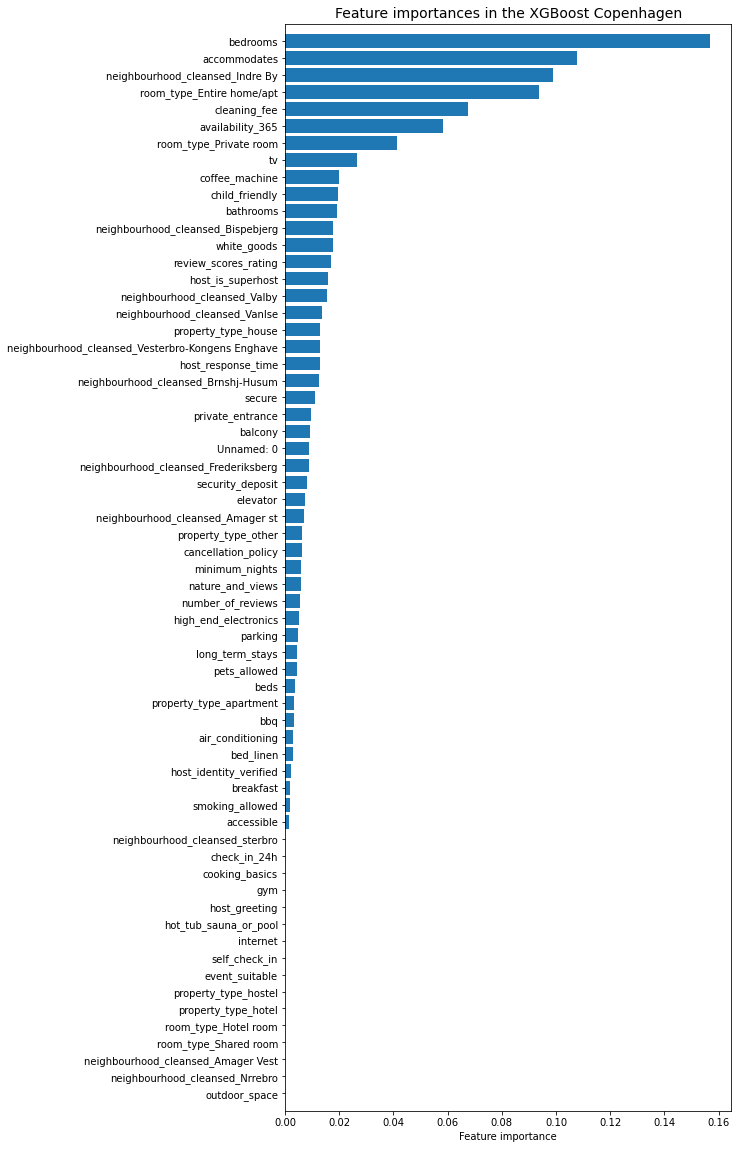

In [6]:
plt.figure(figsize=(8,20))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost Copenhagen", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

In [7]:
## Repeat for Singapore
sg_rf2 = sg_rf.copy()

sg_rf2['review_scores_rating'] = sg_rf2['review_scores_rating'].replace(0.0, 0.01)
sg_rf2['review_scores_rating'] = np.log(sg_rf2['review_scores_rating'])

X_sg = sg_rf2.drop('price', axis = 1)
y_sg = sg_rf2['price']

## Split train and test set
x_train, x_test, y_train, y_test = train_test_split(X_sg, y_sg, test_size = 0.3, random_state = 123)

xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(x_train, y_train)
training_preds_xgb_reg = xgb_reg.predict(x_train)
val_preds_xgb_reg = xgb_reg.predict(x_test)

from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score, mean_absolute_error

## Results
print("\nTraining RMSE:", round((mean_squared_error(y_train, training_preds_xgb_reg)**0.5),4))
print("Validation RMSE:", round((mean_squared_error(y_test, val_preds_xgb_reg)**0.5),4))
print("Training MAE: ", round(mean_absolute_error(y_train, training_preds_xgb_reg),4))
print("Validation MAE: ", round(mean_absolute_error(y_test, val_preds_xgb_reg), 4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb_reg),4))

[10:46:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Training RMSE: 55.8978
Validation RMSE: 67.3487
Training MAE:  32.8902
Validation MAE:  35.9379

Training r2: 0.7667
Validation r2: 0.6586


In [8]:
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=x_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)
ft_weights_xgb_reg

,weight
neighbourhood_cleansed_Bedok,0.000000
essentials,0.000000
property_type_other,0.000000
neighbourhood_cleansed_Ang Mo Kio,0.000000
neighbourhood_cleansed_Bishan,0.000000
...,...
neighbourhood_cleansed_Downtown Core,0.035245
room_type_Private room,0.044025
accommodates,0.060690
room_type_Entire home/apt,0.063412


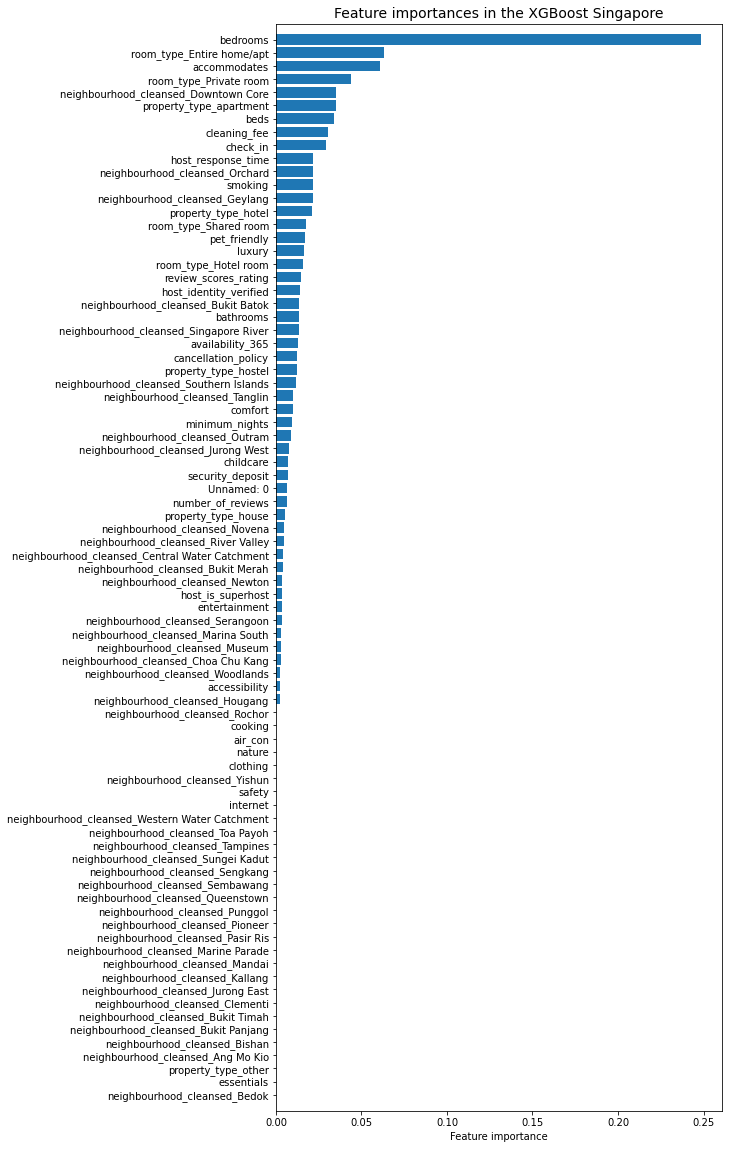

In [9]:
plt.figure(figsize=(8,20))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost Singapore", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()